In [1]:
import cma
import cma.test
import numpy as np
import sys
import pandas as pd
import math

In [2]:
help(cma)

Help on package cma:

NAME
    cma

DESCRIPTION
    Package `cma` implements the CMA-ES (Covariance Matrix Adaptation
    Evolution Strategy).
    
    CMA-ES is a stochastic optimizer for robust non-linear non-convex
    derivative- and function-value-free numerical optimization.
    
    This implementation can be used with Python versions >= 2.6, namely
    2.6, 2.7, 3.3, 3.4, 3.5, 3.6.
    
    CMA-ES searches for a minimizer (a solution x in :math:`R^n`) of an
    objective function f (cost function), such that f(x) is minimal.
    Regarding f, only a passably reliable ranking of the candidate
    solutions in each iteration is necessary. Neither the function values
    itself, nor the gradient of f need to be available or do matter (like
    in the downhill simplex Nelder-Mead algorithm). Some termination
    criteria however depend on actual f-values.
    
    The `cma` module provides two independent implementations of the
    CMA-ES algorithm in the classes `cma.CMAEvolutionSt

In [3]:
help(cma.fmin)

Help on function fmin in module cma.evolution_strategy:

fmin(objective_function, x0, sigma0, options=None, args=(), gradf=None, restarts=0, restart_from_best='False', incpopsize=2, eval_initial_x=False, parallel_objective=None, noise_handler=None, noise_change_sigma_exponent=1, noise_kappa_exponent=0, bipop=False, callback=None)
    functional interface to the stochastic optimizer CMA-ES
    for non-convex function minimization.
    
    Calling Sequences
    ``fmin(objective_function, x0, sigma0)``
        minimizes ``objective_function`` starting at ``x0`` and with
        standard deviation ``sigma0`` (step-size)
    ``fmin(objective_function, x0, sigma0, options={'ftarget': 1e-5})``
        minimizes ``objective_function`` up to target function value 1e-5,
        which is typically useful for benchmarking.
    ``fmin(objective_function, x0, sigma0, args=('f',))``
        minimizes ``objective_function`` called with an additional
        argument ``'f'``.
    ``fmin(objective_func

In [4]:
help(cma.CMAEvolutionStrategy)

Help on class CMAEvolutionStrategy in module cma.evolution_strategy:

class CMAEvolutionStrategy(cma.interfaces.OOOptimizer)
 |  CMAEvolutionStrategy(x0, sigma0, inopts=None)
 |  
 |  CMA-ES stochastic optimizer class with ask-and-tell interface.
 |  
 |  Calling Sequences
 |  =================
 |  
 |  - ``es = CMAEvolutionStrategy(x0, sigma0)``
 |  
 |  - ``es = CMAEvolutionStrategy(x0, sigma0, opts)``
 |  
 |  - ``es = CMAEvolutionStrategy(x0, sigma0).optimize(objective_fct)``
 |  
 |  - ::
 |  
 |      res = CMAEvolutionStrategy(x0, sigma0,
 |                              opts).optimize(objective_fct).result
 |  
 |  Arguments
 |  =========
 |  `x0`
 |      initial solution, starting point. `x0` is given as "phenotype"
 |      which means, if::
 |  
 |          opts = {'transformation': [transform, inverse]}
 |  
 |      is given and ``inverse is None``, the initial mean is not
 |      consistent with `x0` in that ``transform(mean)`` does not
 |      equal to `x0` unless ``transfor

In [5]:
help(cma.CMAOptions)

Help on class CMAOptions in module cma.evolution_strategy:

class CMAOptions(builtins.dict)
 |  CMAOptions(s=None, **kwargs)
 |  
 |  a dictionary with the available options and their default values
 |  for class `CMAEvolutionStrategy`.
 |  
 |  ``CMAOptions()`` returns a `dict` with all available options and their
 |  default values with a comment string.
 |  
 |  ``CMAOptions('verb')`` returns a subset of recognized options that
 |  contain 'verb' in there keyword name or (default) value or
 |  description.
 |  
 |  ``CMAOptions(opts)`` returns the subset of recognized options in
 |  ``dict(opts)``.
 |  
 |  Option values can be "written" in a string and, when passed to `fmin`
 |  or `CMAEvolutionStrategy`, are evaluated using "N" and "popsize" as
 |  known values for dimension and population size (sample size, number
 |  of new solutions per iteration). All default option values are given
 |  as such a string.
 |  
 |  Details
 |  -------
 |  `CMAOptions` entries starting with ``tol

In [8]:
def f(x):
    return np.sum(np.square(x)) if np.sum(x) > 1 else sys.maxsize

In [9]:
es = cma.CMAEvolutionStrategy(10*[1], 0.5, {'bounds': [0, 2], })

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=334174, Fri Dec 13 11:30:45 2019)


In [10]:
es.optimize(f, verb_disp=1)

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 9.297956451173906e+00 1.0e+00 5.03e-01  5e-01  5e-01 0:00.0
    2     20 9.087294198145610e+00 1.2e+00 5.19e-01  5e-01  6e-01 0:00.0
    3     30 6.290086169271653e+00 1.4e+00 5.26e-01  5e-01  6e-01 0:00.0
    4     40 3.667303647081697e+00 1.4e+00 5.47e-01  5e-01  6e-01 0:00.0
    5     50 4.192620837918611e+00 1.5e+00 5.09e-01  5e-01  6e-01 0:00.0
    6     60 3.587261970368212e+00 1.5e+00 4.95e-01  4e-01  5e-01 0:00.0
    7     70 1.607232770475297e+00 1.6e+00 4.96e-01  4e-01  5e-01 0:00.0
    8     80 1.184372448509091e+00 1.6e+00 5.33e-01  5e-01  6e-01 0:00.0
    9     90 1.893474363349450e+00 1.6e+00 5.15e-01  5e-01  6e-01 0:00.0
   10    100 1.571998262725276e+00 1.7e+00 5.33e-01  5e-01  6e-01 0:00.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    110 1.224087363220818e+00 1.7e+00 5.06e-01  4e-01  5e-01 0:00.0
   12    120 1.582857708045483e+00 1.7e+00 4.76e-01  

  103   1030 1.022252154477178e-01 6.1e+00 1.00e-02  4e-03  7e-03 0:00.3
  104   1040 1.025026141757014e-01 6.3e+00 9.28e-03  4e-03  6e-03 0:00.3
  105   1050 1.013061283357296e-01 6.3e+00 9.14e-03  4e-03  6e-03 0:00.3
  106   1060 1.017824755466077e-01 6.7e+00 8.38e-03  3e-03  6e-03 0:00.3
  107   1070 1.014020799625979e-01 6.8e+00 7.59e-03  3e-03  5e-03 0:00.3
  108   1080 1.014154851979832e-01 6.9e+00 6.92e-03  3e-03  5e-03 0:00.3
  109   1090 1.017724386367850e-01 7.4e+00 6.26e-03  2e-03  4e-03 0:00.3
  110   1100 1.009722673272680e-01 7.6e+00 5.89e-03  2e-03  4e-03 0:00.3
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   1110 1.012365837309985e-01 7.7e+00 5.71e-03  2e-03  4e-03 0:00.3
  112   1120 1.010321400816654e-01 7.8e+00 5.78e-03  2e-03  4e-03 0:00.3
  113   1130 1.012972409680950e-01 7.9e+00 5.83e-03  2e-03  4e-03 0:00.3
  114   1140 1.008947548923459e-01 8.0e+00 6.03e-03  2e-03  4e-03 0:00.3
  115   1150 1.012035477668791e-01 8.2e+00 5.96e-03 

  206   2060 1.000091703115316e-01 1.1e+02 8.06e-04  3e-04  5e-04 0:00.5
  207   2070 1.000065869554010e-01 1.1e+02 7.67e-04  3e-04  4e-04 0:00.5
  208   2080 1.000087575992875e-01 1.2e+02 7.73e-04  3e-04  4e-04 0:00.5
  209   2090 1.000097018748035e-01 1.2e+02 7.72e-04  3e-04  4e-04 0:00.5
  210   2100 1.000099829208033e-01 1.4e+02 7.42e-04  2e-04  4e-04 0:00.5
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  211   2110 1.000059573572323e-01 1.6e+02 7.01e-04  2e-04  4e-04 0:00.6
  212   2120 1.000057697198544e-01 1.6e+02 6.72e-04  2e-04  4e-04 0:00.6
  213   2130 1.000059847409951e-01 1.6e+02 6.37e-04  2e-04  4e-04 0:00.6
  214   2140 1.000058328057817e-01 1.6e+02 5.98e-04  2e-04  3e-04 0:00.6
  215   2150 1.000058752049041e-01 1.7e+02 5.76e-04  2e-04  3e-04 0:00.6
  216   2160 1.000047964157730e-01 1.7e+02 5.94e-04  2e-04  3e-04 0:00.6
  217   2170 1.000053214001383e-01 1.7e+02 6.15e-04  2e-04  3e-04 0:00.6
  218   2180 1.000039167662207e-01 1.7e+02 6.34e-04 

  309   3090 1.000000291490650e-01 1.3e+03 5.81e-05  2e-05  2e-05 0:00.8
  310   3100 1.000000231213810e-01 1.3e+03 5.72e-05  1e-05  2e-05 0:00.8
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  311   3110 1.000000213585274e-01 1.4e+03 5.68e-05  1e-05  2e-05 0:00.8
  312   3120 1.000000220495595e-01 1.5e+03 5.58e-05  1e-05  2e-05 0:00.8
  313   3130 1.000000215285154e-01 1.6e+03 5.28e-05  1e-05  2e-05 0:00.8
  314   3140 1.000000222312645e-01 1.6e+03 5.21e-05  1e-05  2e-05 0:00.8
  315   3150 1.000000131265026e-01 1.7e+03 5.55e-05  1e-05  2e-05 0:00.8
  316   3160 1.000000177645365e-01 1.7e+03 5.37e-05  1e-05  2e-05 0:00.8
  317   3170 1.000000173861080e-01 1.8e+03 4.89e-05  1e-05  2e-05 0:00.8
  318   3180 1.000000162761518e-01 1.8e+03 4.82e-05  1e-05  2e-05 0:00.8
  319   3190 1.000000168523250e-01 2.0e+03 4.77e-05  1e-05  2e-05 0:00.8
  320   3200 1.000000208261228e-01 2.2e+03 4.61e-05  1e-05  2e-05 0:00.8
Iterat #Fevals   function value  axis ratio  sigma  

  411   4110 1.000000001929338e-01 2.4e+04 2.71e-05  5e-06  7e-06 0:01.0
  412   4120 1.000000004321699e-01 2.4e+04 2.58e-05  5e-06  7e-06 0:01.0
  413   4130 1.000000005848963e-01 2.5e+04 2.46e-05  5e-06  6e-06 0:01.0
  414   4140 1.000000004783776e-01 2.4e+04 2.29e-05  4e-06  6e-06 0:01.0
  415   4150 1.000000002733578e-01 2.4e+04 2.03e-05  4e-06  5e-06 0:01.0
  416   4160 1.000000002854857e-01 2.5e+04 1.79e-05  3e-06  5e-06 0:01.0
  417   4170 1.000000003050149e-01 2.5e+04 1.69e-05  3e-06  4e-06 0:01.0
  418   4180 1.000000002232899e-01 2.5e+04 1.66e-05  3e-06  4e-06 0:01.0
  419   4190 1.000000003557583e-01 2.5e+04 1.54e-05  3e-06  4e-06 0:01.0
  420   4200 1.000000002497754e-01 2.7e+04 1.43e-05  3e-06  4e-06 0:01.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  421   4210 1.000000001856524e-01 2.8e+04 1.28e-05  2e-06  3e-06 0:01.0
  422   4220 1.000000001595841e-01 2.8e+04 1.23e-05  2e-06  3e-06 0:01.0
  423   4230 1.000000001430836e-01 2.9e+04 1.15e-05 

  514   5140 1.000000000108107e-01 2.4e+05 2.61e-06  3e-07  5e-07 0:01.2
  515   5150 1.000000000089063e-01 2.5e+05 2.51e-06  3e-07  5e-07 0:01.2
  516   5160 1.000000000092061e-01 2.5e+05 2.51e-06  3e-07  4e-07 0:01.2
  517   5170 1.000000000073447e-01 2.5e+05 2.75e-06  3e-07  5e-07 0:01.2
  518   5180 1.000000000074657e-01 2.8e+05 2.75e-06  3e-07  5e-07 0:01.2
  519   5190 1.000000000069256e-01 2.9e+05 2.75e-06  3e-07  5e-07 0:01.2
  520   5200 1.000000000069089e-01 3.0e+05 2.81e-06  3e-07  5e-07 0:01.2
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  521   5210 1.000000000061463e-01 3.1e+05 2.70e-06  3e-07  5e-07 0:01.2
  522   5220 1.000000000063588e-01 3.1e+05 2.64e-06  3e-07  5e-07 0:01.3
  523   5230 1.000000000057940e-01 3.3e+05 2.69e-06  3e-07  5e-07 0:01.3
  524   5240 1.000000000053589e-01 3.3e+05 2.73e-06  3e-07  5e-07 0:01.3
  525   5250 1.000000000061183e-01 3.2e+05 2.65e-06  3e-07  5e-07 0:01.3
  526   5260 1.000000000037553e-01 3.3e+05 2.74e-06 

In [11]:
es = cma.CMAEvolutionStrategy(10 * [0.2], 0.5, {'bounds': [0, 2]})

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=373207, Fri Dec 13 11:30:48 2019)


In [12]:
es.optimize(f, verb_disp=1)

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 7.668985942567325e-01 1.0e+00 4.70e-01  5e-01  5e-01 0:00.0
    2     20 1.414899172523549e+00 1.1e+00 4.43e-01  4e-01  4e-01 0:00.0
    3     30 5.735311686154008e-01 1.2e+00 4.00e-01  4e-01  4e-01 0:00.0
    4     40 1.121951169211186e+00 1.3e+00 3.62e-01  3e-01  4e-01 0:00.0
    5     50 6.354064975855318e-01 1.4e+00 3.22e-01  3e-01  3e-01 0:00.0
    6     60 4.834793194409244e-01 1.4e+00 2.91e-01  3e-01  3e-01 0:00.0
    7     70 4.751461778726949e-01 1.4e+00 2.81e-01  2e-01  3e-01 0:00.0
    8     80 5.516437432406355e-01 1.5e+00 2.74e-01  2e-01  3e-01 0:00.0
    9     90 4.380787916330521e-01 1.5e+00 2.47e-01  2e-01  3e-01 0:00.0
   10    100 1.738513751102683e-01 1.5e+00 2.21e-01  2e-01  2e-01 0:00.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    110 2.472633309889963e-01 1.6e+00 2.03e-01  2e-01  2e-01 0:00.0
   12    120 2.161425207762034e-01 1.6e+00 1.79e-01  

  103   1030 1.011715949651647e-01 1.1e+01 8.39e-03  4e-03  6e-03 0:00.3
  104   1040 1.011037871329515e-01 1.1e+01 8.42e-03  4e-03  6e-03 0:00.3
  105   1050 1.010305467529991e-01 1.1e+01 7.78e-03  4e-03  6e-03 0:00.3
  106   1060 1.010089683321356e-01 1.1e+01 7.63e-03  4e-03  6e-03 0:00.3
  107   1070 1.012580642851836e-01 1.1e+01 7.51e-03  4e-03  5e-03 0:00.3
  108   1080 1.008584740100027e-01 1.1e+01 7.33e-03  3e-03  5e-03 0:00.3
  109   1090 1.007063813233309e-01 1.2e+01 7.39e-03  3e-03  5e-03 0:00.3
  110   1100 1.006778116062983e-01 1.2e+01 7.37e-03  3e-03  5e-03 0:00.3
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   1110 1.005922433948027e-01 1.2e+01 7.15e-03  3e-03  5e-03 0:00.3
  112   1120 1.005749269840782e-01 1.3e+01 6.81e-03  3e-03  5e-03 0:00.3
  113   1130 1.007766810769795e-01 1.3e+01 6.50e-03  3e-03  5e-03 0:00.3
  114   1140 1.005224531546569e-01 1.3e+01 6.29e-03  3e-03  5e-03 0:00.3
  115   1150 1.005561303795112e-01 1.4e+01 6.77e-03 

  206   2060 1.000041282735206e-01 1.7e+02 6.55e-04  2e-04  4e-04 0:00.5
  207   2070 1.000037399338369e-01 1.7e+02 6.23e-04  2e-04  4e-04 0:00.5
  208   2080 1.000039066031424e-01 1.8e+02 6.11e-04  2e-04  4e-04 0:00.5
  209   2090 1.000040841280850e-01 1.9e+02 5.99e-04  2e-04  4e-04 0:00.5
  210   2100 1.000037484775259e-01 1.9e+02 5.57e-04  2e-04  4e-04 0:00.5
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  211   2110 1.000027483710249e-01 2.0e+02 5.20e-04  2e-04  4e-04 0:00.5
  212   2120 1.000031412510453e-01 2.0e+02 5.14e-04  2e-04  3e-04 0:00.5
  213   2130 1.000032233894841e-01 2.0e+02 5.14e-04  2e-04  3e-04 0:00.5
  214   2140 1.000026931350515e-01 2.0e+02 4.95e-04  2e-04  3e-04 0:00.5
  215   2150 1.000028845285776e-01 2.1e+02 4.74e-04  2e-04  3e-04 0:00.6
  216   2160 1.000020200120704e-01 2.2e+02 5.11e-04  2e-04  3e-04 0:00.6
  217   2170 1.000012311768385e-01 2.3e+02 5.12e-04  2e-04  3e-04 0:00.6
  218   2180 1.000025161199038e-01 2.3e+02 4.92e-04 

  309   3090 1.000000262451041e-01 2.6e+03 6.67e-05  2e-05  3e-05 0:00.8
  310   3100 1.000000365194784e-01 2.6e+03 6.87e-05  2e-05  3e-05 0:00.8
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  311   3110 1.000000349912447e-01 2.7e+03 6.49e-05  2e-05  3e-05 0:00.8
  312   3120 1.000000255242963e-01 2.7e+03 6.63e-05  2e-05  3e-05 0:00.8
  313   3130 1.000000240488685e-01 2.7e+03 6.85e-05  2e-05  3e-05 0:00.8
  314   3140 1.000000271480077e-01 2.7e+03 6.97e-05  2e-05  3e-05 0:00.8
  315   3150 1.000000287347045e-01 2.9e+03 7.37e-05  2e-05  3e-05 0:00.8
  316   3160 1.000000274238259e-01 3.1e+03 7.54e-05  2e-05  3e-05 0:00.8
  317   3170 1.000000252840077e-01 3.2e+03 7.91e-05  2e-05  4e-05 0:00.8
  318   3180 1.000000277644687e-01 3.3e+03 8.12e-05  2e-05  4e-05 0:00.8
  319   3190 1.000000220389735e-01 3.3e+03 7.73e-05  2e-05  3e-05 0:00.8
  320   3200 1.000000237195587e-01 3.4e+03 7.78e-05  2e-05  3e-05 0:00.8
Iterat #Fevals   function value  axis ratio  sigma  

  411   4110 1.000000001796283e-01 2.6e+04 9.22e-06  2e-06  3e-06 0:01.0
  412   4120 1.000000002598615e-01 2.6e+04 9.08e-06  2e-06  3e-06 0:01.0
  413   4130 1.000000001873083e-01 2.5e+04 9.28e-06  2e-06  3e-06 0:01.0
  414   4140 1.000000002364063e-01 2.5e+04 9.77e-06  2e-06  3e-06 0:01.0
  415   4150 1.000000002480379e-01 2.7e+04 9.73e-06  2e-06  3e-06 0:01.0
  416   4160 1.000000001217212e-01 2.8e+04 1.01e-05  2e-06  3e-06 0:01.0
  417   4170 1.000000001546932e-01 2.8e+04 9.17e-06  2e-06  3e-06 0:01.0
  418   4180 1.000000001344515e-01 2.8e+04 8.37e-06  2e-06  2e-06 0:01.0
  419   4190 1.000000001680143e-01 2.9e+04 7.55e-06  1e-06  2e-06 0:01.0
  420   4200 1.000000001095432e-01 2.9e+04 6.85e-06  1e-06  2e-06 0:01.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  421   4210 1.000000001326512e-01 3.0e+04 6.51e-06  1e-06  2e-06 0:01.0
  422   4220 1.000000001091966e-01 3.1e+04 6.22e-06  1e-06  2e-06 0:01.0
  423   4230 1.000000001344957e-01 3.1e+04 5.80e-06 

  514   5140 1.000000000006076e-01 3.4e+05 9.82e-07  1e-07  2e-07 0:01.2
  515   5150 1.000000000003775e-01 3.7e+05 1.01e-06  2e-07  2e-07 0:01.2
  516   5160 1.000000000004490e-01 3.8e+05 1.03e-06  2e-07  2e-07 0:01.2
  517   5170 1.000000000005368e-01 3.8e+05 9.81e-07  1e-07  2e-07 0:01.2
  518   5180 1.000000000006849e-01 3.7e+05 9.76e-07  1e-07  2e-07 0:01.2
  519   5190 1.000000000005606e-01 3.9e+05 9.27e-07  1e-07  2e-07 0:01.2
  520   5200 1.000000000004849e-01 4.1e+05 8.48e-07  1e-07  2e-07 0:01.2
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  521   5210 1.000000000004164e-01 4.3e+05 8.23e-07  1e-07  2e-07 0:01.2
  522   5220 1.000000000004043e-01 4.3e+05 7.91e-07  1e-07  2e-07 0:01.2
  523   5230 1.000000000003182e-01 4.4e+05 7.13e-07  1e-07  1e-07 0:01.3
  524   5240 1.000000000003017e-01 4.6e+05 6.75e-07  1e-07  1e-07 0:01.3
  525   5250 1.000000000001538e-01 4.7e+05 6.81e-07  1e-07  1e-07 0:01.3
  526   5260 1.000000000001811e-01 4.9e+05 6.87e-07 

In [13]:
while not es.stop():
    X = es.ask()
    print(len(X))
    es.tell(X, [f(x) for x in X])
    es.disp()

In [14]:
es.result_pretty()

termination on tolfun=1e-11
final/bestever f-value = 1.000000e-01 1.000000e-01
incumbent solution: [0.10000029 0.10000024 0.10000008 0.09999998 0.10000004 0.09999981
 0.09999988 0.09999999 ...]
std deviations: [1.42106290e-07 1.48549643e-07 1.07967156e-07 1.28658868e-07
 1.13299951e-07 1.33470557e-07 1.28138230e-07 1.02891215e-07 ...]


CMAEvolutionStrategyResult(xbest=array([0.10000023, 0.09999988, 0.10000008, 0.10000011, 0.09999998,
       0.10000001, 0.09999993, 0.09999998, 0.09999991, 0.09999991]), fbest=0.1000000000001538, evals_best=5249, evaluations=5300, iterations=530, xfavorite=array([-0.20000029,  0.10000024, -0.20000008,  0.09999998,  0.10000004,
       -0.19999981, -0.19999988,  0.09999999,  0.09999976, -0.19999992]), stds=array([1.42106290e-07, 1.48549643e-07, 1.07967156e-07, 1.28658868e-07,
       1.13299951e-07, 1.33470557e-07, 1.28138230e-07, 1.02891215e-07,
       1.17671676e-07, 9.92396179e-08]), stop={'tolfun': 1e-11})

In [15]:
def fit(x):
    return np.sum(x) - 10

In [17]:
es = cma.CMAEvolutionStrategy([0.5,0.5], 0.5, {'bounds': [0, 2]})  #doctest: +ELLIPSIS

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=284551, Fri Dec 13 11:30:56 2019)


In [18]:
es.optimize(f, iterations=100, callback=es.logger.add())

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 6.480854542950516e-01 1.0e+00 4.18e-01  4e-01  4e-01 0:00.0
    2     12 6.346654790797293e-01 1.3e+00 3.52e-01  2e-01  3e-01 0:00.0
    3     18 9.984430251634246e-01 1.5e+00 3.90e-01  3e-01  4e-01 0:00.0
  100    600 5.000000275684555e-01 1.4e+03 5.37e-04  3e-05  3e-05 0:00.1


In [19]:
while not es.stop():
    X = es.ask()
#     print(len(X))
    es.tell(X, [f(x) for x in X])
    es.logger.add()
    es.disp()

  200   1200 5.000000000291059e-01 2.0e+01 2.16e-05  2e-05  2e-05 0:00.2
  251   1506 5.000000000291038e-01 6.6e+02 3.16e-05  3e-05  3e-05 0:00.2


/Users/purujit/anaconda3/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=171)
  ')')


In [20]:
while not es.stop():
    fit, X = [], []
    while len(X) < es.popsize:
        curr_fit = None
        while curr_fit in (None, np.NaN):
            x = es.ask(1)[0]
            curr_fit = f(x) # might return np.NaN
        X.append(x)
        fit.append(curr_fit)
    es.tell(X, fit)
    es.logger.add()
    es.disp()  #doctest: +ELLIPSIS

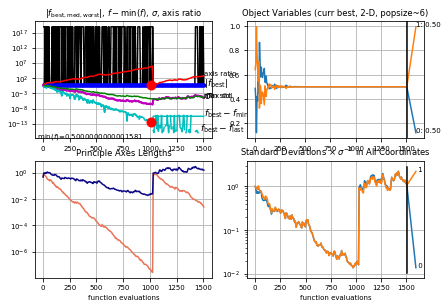

In [21]:
es.logger.plot()  # will plot data
cma.s.figshow()

In [22]:
es.result

CMAEvolutionStrategyResult(xbest=array([0.49999976, 0.50000024]), fbest=0.5000000000001581, evals_best=1012, evaluations=1506, iterations=251, xfavorite=array([0.5, 0.5]), stds=array([3.38893116e-05, 3.38937286e-05]), stop={'tolfunhist': 1e-12})